In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pysr import PySRRegressor


In [2]:
data_files = !ls data

In [3]:
data_files

['p.0.8525.dat', 'p.0.8552.dat', 'p.0.856.dat', 'p.0.86.dat', 'p.0.9.dat']

In [4]:
cols = ['time', 'x', 'y', 'z', 'x+n', 'y+n', 'z+n']
# where n is a small gaussian noise, in case, and n isn't always the same
df0 = pd.read_csv('data/'+data_files[0], delim_whitespace=True, names=cols)
df0.sort_values(by='time', inplace=True)
df0['vx'] = df0.x.diff()/df0.time.diff()
df0['vy'] = df0.y.diff()/df0.time.diff()
df0['vz'] = df0.z.diff()/df0.time.diff()
df0.fillna(0, inplace=True)
# df0.set_index('time', inplace=True)

In [5]:
df0.describe()

,time,x,y,z,x+n,y+n,z+n,vx,vy,vz
count,13144.000000,13144.000000,13144.000000,13144.000000,13144.000000,13144.000000,13144.000000,13144.000000,13144.000000,13144.000000
mean,99002.870724,0.257063,-0.673291,-0.631620,0.257006,-0.673222,-0.631666,-0.034334,-0.112387,-0.066833
std,580.030124,1.239374,0.579841,0.373800,1.239407,0.580000,0.373910,0.481540,0.222151,0.174061
min,98000.105000,-1.848158,-2.043650,-1.627919,-1.866222,-2.065787,-1.648564,-2.252485,-1.205012,-0.985924
25%,98493.714500,-0.869103,-1.099085,-0.887025,-0.868371,-1.098608,-0.886118,-0.245644,-0.175294,-0.082922
50%,99009.525000,0.213582,-0.612473,-0.578167,0.215608,-0.611464,-0.578334,0.045183,-0.016436,0.017221
75%,99503.944500,1.270004,-0.149421,-0.321685,1.270205,-0.150304,-0.321482,0.299052,0.039711,0.023570
max,100000.000000,2.887648,0.143876,-0.058135,2.900529,0.171688,-0.039191,0.927079,0.057739,0.097753


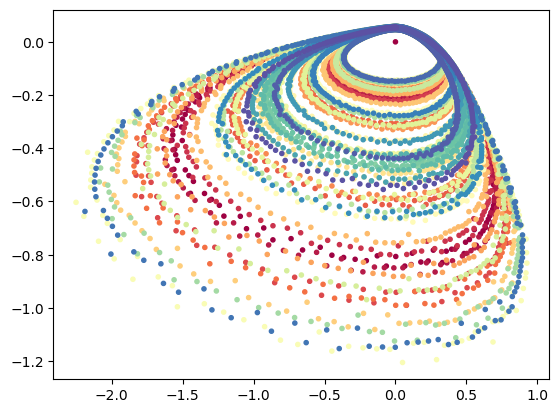

In [6]:
fig, ax = plt.subplots()

ax.scatter(df0.vx, df0.vy, c=df0.time, cmap='Spectral', marker='.')

In [7]:
train_data = df0.iloc[0:100].copy()

In [8]:
X = train_data[['vx', 'vy', 'vz']]
y = train_data[['x', 'y', 'z']]

In [9]:
default_pysr_params = dict(
    populations=30, # https://astroautomata.com/PySR/options/#populations
    model_selection="best",
)

In [10]:
model = PySRRegressor(
    niterations=30,
    binary_operators=["plus", "mult"],
    unary_operators=["cos", "exp", "sin"],
    **default_pysr_params
)

model.fit(X, y)

/opt/homebrew/anaconda3/envs/symbol/lib/python3.8/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/opt/homebrew/anaconda3/envs/symbol/lib/python3.8/site-packages/pysr/julia_helpers.py:197: UserWarning: Your system's Python library is static (e.g., conda), so precompilation will be turned off. For a dynamic library, try `pyenv`.
  warnings.warn(


Started!

Cycles per second: 1.340e+05
Head worker occupation: 13.0%
Progress: 371 / 2700 total iterations (13.741%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           5.197e-01  -1.303e-04  1.4629587
2           3.504e-01  3.942e-01  exp(vx)
3           1.994e-01  5.637e-01  (-3.7549121 * vy)
4           9.076e-02  7.871e-01  exp(-1.495107 * vz)
5           8.323e-02  8.657e-02  exp(sin(-1.7167724 * vz))
6           5.240e-02  4.627e-01  ((-3.7549121 * sin(vz)) + vx)
7           2.048e-02  9.397e-01  (((vz * -2.45204) + 0.37317082) + vx)
8           1.443e-02  3.496e-01  ((vx + (-2.4176283 * vy)) + sin(0.22276446))
10          1.092e-02  1.393e-01  (((vy + 0.17565674) + vx) + (-3.7549121 * sin(vy)))
13          1.002e-02  2.891e-02  (((((vz * vy) + vy) * -2.45204) + vx) + (vy * -1.8329923))
14          7.085e-03  3.463e-01  ((sin(((vz * vy) +

PySRRegressor.equations_ = [
[
	    pick     score                                           equation  \
	0         0.000000                                          1.4712522   
	1         0.394058                                            exp(vx)   
	2         0.609201                                  (vy * -3.9929955)   
	3         0.741598                                exp(-1.495107 * vz)   
	4         0.988353                           (vx + (vy * -2.8516767))   
	5         0.300519                      (vx + (sin(vy) * -3.0607092))   
	6         0.606110              ((vx * 1.487635) + (-2.4176283 * vy))   
	7         0.239734        ((sin(vy) * -2.4907484) + (vx * 1.4593693))   
	8         0.229826  (((exp(exp(vy)) * -1.972551) + 4.7491584) + 0....   
	9         1.192443  ((vy * -2.3918242) + sin((vy * -2.4529483) + vx))   
	10        0.624124  (sin(exp(vy + (1.0710224 + vy))) + (vz * -2.84...   
	11        0.110041  (sin(exp((sin(vy) + 1.06202) + vy)) + (vz * -2...   
	12        0.052449  (sin(sin(exp((vy + vy) + 1.0710224))) + (sin(v...   
	13        0.184645  (sin(exp(sin(vy + vy) + 1.0710224)) + (sin(sin...   
	14        0.422286  (sin(exp(sin(vz) + exp(vy + (vy + 0.092916854)...   
	15        0.096568  (sin(exp(sin(vy + (vy * 1.16761)) + 1.0710224)...   
	16  >>>>  0.170344  (sin(sin(exp(((vy + vy) + 0.2175569) + sin(1.0...   
	17        0.164342  (sin(exp(sin(sin((vy + vz) + vz)) + 1.0710224)...   
	18        0.120730  (sin(exp(sin(sin(sin(vy + vz) + vz)) + 1.07102...   
	19        0.073213  (sin(exp(sin(sin(sin(sin(vy + vz)) + vz)) + 1....   
	
	        loss  complexity  
	0   0.519594           1  
	1   0.350370           2  
	2   0.190526           3  
	3   0.090757           4  
	4   0.033779           5  
	5   0.025011           6  
	6   0.013643           7  
	7   0.010735           8  
	8   0.008531           9  
	9   0.002589          10  
	10  0.001387          11  
	11  0.001242          12  
	12  0.001179          13  
	13  0.000980          14  
	14  0.000643          15  
	15  0.000583          16  
	16  0.000492          17  
	17  0.000417          18  
	18  0.000370          19  
	19  0.000344          20  
], [
	    pick     score                                           equation  \
	0         0.000000                                                 vy   
	1         0.491577                                    (vz * 1.327394)   
	2         1.592197                    ((vy * 1.3569521) + 0.10588604)   
	3         0.122826         ((vz + (vz + 0.091836244)) * sin(cos(vx)))   
	4         0.300299     ((vz + (vz + 0.10211446)) * sin(cos(sin(vx))))   
	5         0.007675  ((vz + (vz + sin(0.10211446))) * sin(cos(sin(v...   
	6         0.111587  ((vz + sin(vz + 0.09234747)) * (sin(cos(vx)) +...   
	7         0.043231  (((vz + vz) + (0.11569057 + -0.018392643)) * s...   
	8         0.097761  (((vz + ((sin(0.39343992) + -0.2774801) * cos(...   
	9   >>>>  0.123359  ((sin(vz + (sin(sin(0.39343992)) + -0.2774801)...   
	10        0.017313  ((sin(vz + ((sin(0.39343992) + -0.2774801) * c...   
	11        0.000899  ((sin(vz + ((sin(0.39343992) + -0.2774801) * c...   
	
	        loss  complexity  
	0   0.008037           1  
	1   0.003007           3  
	2   0.000124           5  
	3   0.000076           9  
	4   0.000056          10  
	5   0.000056          11  
	6   0.000050          12  
	7   0.000046          14  
	8   0.000042          15  
	9   0.000037          16  
	10  0.000036          18  
	11  0.000036          19  
], [
	    pick         score                                           equation  \
	0         0.000000e+00                                                 vy   
	1         1.387167e+00                                  (-0.1414728 + vy)   
	2         8.352885e-01                   ((vy * 1.1320584) + -0.10089746)   
	3         3.591856e-07    (0.19879739 + ((vy * 1.1320776) + -0.29968774))   
	4         7.013190e-01       ((-0.48372126 + vy) + (0.3702422 * cos(vy)))   
	5         6.205749

In [11]:
model

PySRRegressor.equations_ = [
[
	    pick     score                                           equation  \
	0         0.000000                                          1.4712522   
	1         0.394058                                            exp(vx)   
	2         0.609201                                  (vy * -3.9929955)   
	3         0.741598                                exp(-1.495107 * vz)   
	4         0.988353                           (vx + (vy * -2.8516767))   
	5         0.300519                      (vx + (sin(vy) * -3.0607092))   
	6         0.606110              ((vx * 1.487635) + (-2.4176283 * vy))   
	7         0.239734        ((sin(vy) * -2.4907484) + (vx * 1.4593693))   
	8         0.229826  (((exp(exp(vy)) * -1.972551) + 4.7491584) + 0....   
	9         1.192443  ((vy * -2.3918242) + sin((vy * -2.4529483) + vx))   
	10        0.624124  (sin(exp(vy + (1.0710224 + vy))) + (vz * -2.84...   
	11        0.110041  (sin(exp((sin(vy) + 1.06202) + vy)) + (vz * -2...   
	12        0.052449  (sin(sin(exp((vy + vy) + 1.0710224))) + (sin(v...   
	13        0.184645  (sin(exp(sin(vy + vy) + 1.0710224)) + (sin(sin...   
	14        0.422286  (sin(exp(sin(vz) + exp(vy + (vy + 0.092916854)...   
	15        0.096568  (sin(exp(sin(vy + (vy * 1.16761)) + 1.0710224)...   
	16  >>>>  0.170344  (sin(sin(exp(((vy + vy) + 0.2175569) + sin(1.0...   
	17        0.164342  (sin(exp(sin(sin((vy + vz) + vz)) + 1.0710224)...   
	18        0.120730  (sin(exp(sin(sin(sin(vy + vz) + vz)) + 1.07102...   
	19        0.073213  (sin(exp(sin(sin(sin(sin(vy + vz)) + vz)) + 1....   
	
	        loss  complexity  
	0   0.519594           1  
	1   0.350370           2  
	2   0.190526           3  
	3   0.090757           4  
	4   0.033779           5  
	5   0.025011           6  
	6   0.013643           7  
	7   0.010735           8  
	8   0.008531           9  
	9   0.002589          10  
	10  0.001387          11  
	11  0.001242          12  
	12  0.001179          13  
	13  0.000980          14  
	14  0.000643          15  
	15  0.000583          16  
	16  0.000492          17  
	17  0.000417          18  
	18  0.000370          19  
	19  0.000344          20  
], [
	    pick     score                                           equation  \
	0         0.000000                                                 vy   
	1         0.491577                                    (vz * 1.327394)   
	2         1.592197                    ((vy * 1.3569521) + 0.10588604)   
	3         0.122826         ((vz + (vz + 0.091836244)) * sin(cos(vx)))   
	4         0.300299     ((vz + (vz + 0.10211446)) * sin(cos(sin(vx))))   
	5         0.007675  ((vz + (vz + sin(0.10211446))) * sin(cos(sin(v...   
	6         0.111587  ((vz + sin(vz + 0.09234747)) * (sin(cos(vx)) +...   
	7         0.043231  (((vz + vz) + (0.11569057 + -0.018392643)) * s...   
	8         0.097761  (((vz + ((sin(0.39343992) + -0.2774801) * cos(...   
	9   >>>>  0.123359  ((sin(vz + (sin(sin(0.39343992)) + -0.2774801)...   
	10        0.017313  ((sin(vz + ((sin(0.39343992) + -0.2774801) * c...   
	11        0.000899  ((sin(vz + ((sin(0.39343992) + -0.2774801) * c...   
	
	        loss  complexity  
	0   0.008037           1  
	1   0.003007           3  
	2   0.000124           5  
	3   0.000076           9  
	4   0.000056          10  
	5   0.000056          11  
	6   0.000050          12  
	7   0.000046          14  
	8   0.000042          15  
	9   0.000037          16  
	10  0.000036          18  
	11  0.000036          19  
], [
	    pick         score                                           equation  \
	0         0.000000e+00                                                 vy   
	1         1.387167e+00                                  (-0.1414728 + vy)   
	2         8.352885e-01                   ((vy * 1.1320584) + -0.10089746)   
	3         3.591856e-07    (0.19879739 + ((vy * 1.1320776) + -0.29968774))   
	4         7.013190e-01       ((-0.48372126 + vy) + (0.3702422 * cos(vy)))   
	5         6.205749